In [ ]:
import math
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from matplotlib.cm import get_cmap
# import addcopyfighandler

import seaborn as sns

from IPython.core.display import HTML

sys.path.append("../RD-systems-and-test-benches/utils")
import data_processing as dp

import model_fsolve as modf
import model_fsolve_series as modf2

import scipy.optimize as sco
import scipy.interpolate as sci

import simu as sim

import hx_hydraulic as hxhy
import from_excel as fe
import data_plots as dplt

import fluids as fds
from CoolProp.CoolProp import PropsSI

import openpyxl as opxl

import torch
import torch_model as modto

In [ ]:
path = r"G:\Drive partagés\BU04-Innovation\PVT-PL-model\Inputs"
file_name = r"\Garcia_Guendulain.xlsx"

In [ ]:
dplt.solve_plot(path, file_name)

In [ ]:
TUV = pd.read_excel('G:\Drive partagés\BU04-Innovation\Hydraulique\PL_database\\230727_TUV_V4.41_x1_Z_water.xlsx')

In [7]:
# read excel file
excel_file = pd.ExcelFile(r'G:\Drive partagés\BU04-Innovation\Hydraulique\components\230725_PL_V4.41.xlsx')

# create dictionary with dataframes
df_dict = {}
for sheet_name in excel_file.sheet_names:
    df_dict[sheet_name] = excel_file.parse(sheet_name)
    df_dict[sheet_name].drop(columns='Unnamed: 0',inplace=True)

In [11]:
df_dict

{'V4F_x1_Z':      Vdot_per_panel         PL
 0                 0   0.000000
 1                10   0.000954
 2                20   0.003815
 3                30   0.008583
 4                40   0.015258
 ..              ...        ...
 196            1960  36.634704
 197            1970  37.009481
 198            1980  37.386165
 199            1990  37.764757
 200            2000  38.145256
 
 [201 rows x 2 columns],
 'V4F_x2_Z':      Vdot_per_panel         PL
 0                 0   0.000000
 1                 5   0.001037
 2                10   0.004149
 3                15   0.009335
 4                20   0.016596
 ..              ...        ...
 196             980  39.846070
 197             985  40.253700
 198             990  40.663404
 199             995  41.075183
 200            1000  41.489036
 
 [201 rows x 2 columns],
 'V4F_x3_Z':      Vdot_per_panel         PL
 0          0.000000   0.000000
 1          3.333333   0.001330
 2          6.666667   0.005320
 3         10.

4.953859329223633
5.9491868019104
6.354280948638916


c:\Users\DualSun\Documents\venvironment\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


70.73117184638977


c:\Users\DualSun\Documents\venvironment\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


54.12693953514099
55.37692046165466


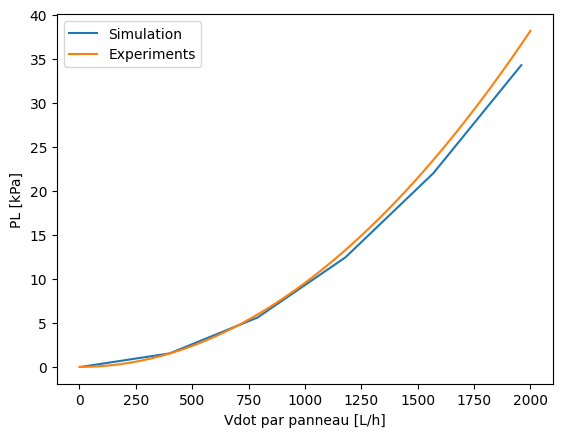

29.827637195587158
36.535120487213135
36.3194420337677


c:\Users\DualSun\Documents\venvironment\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


283.6694767475128


c:\Users\DualSun\Documents\venvironment\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


274.00179648399353
351.618586063385


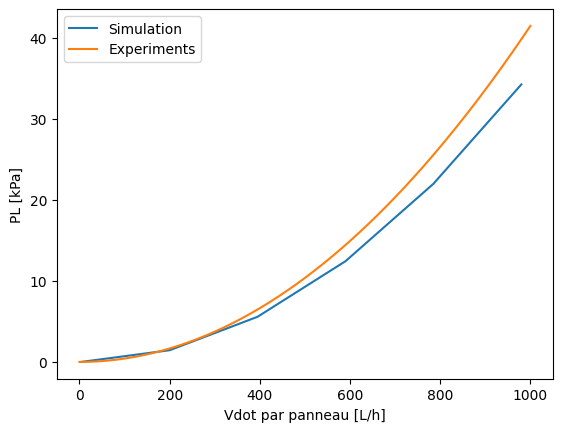

72.5288736820221
74.05813550949097
72.48637247085571


c:\Users\DualSun\Documents\venvironment\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


774.9210648536682
3481.1344423294067


c:\Users\DualSun\Documents\venvironment\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


522.6047558784485


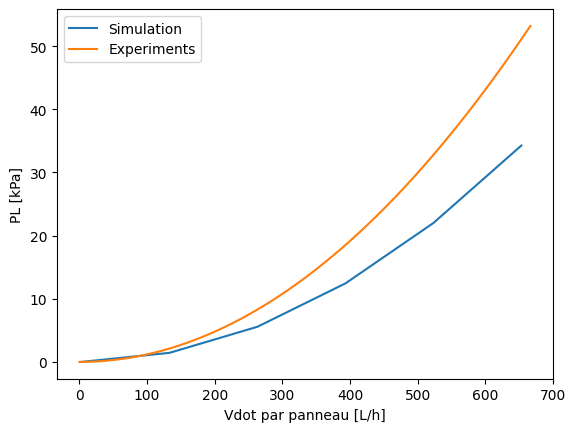

127.80777621269226
151.92488193511963
132.37508010864258
144.333899974823
133.45207142829895
287.6937413215637


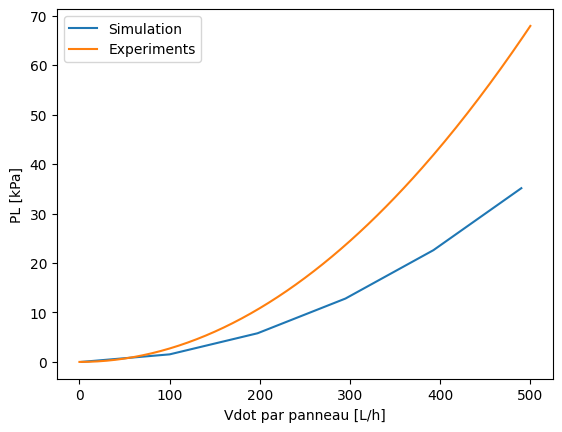

In [22]:
for i in range(4):
    key = list(df_dict.keys())[i]
    list_Vdot = np.array(df_dict[key]['Vdot_per_panel'])
    list_Dv = list_Vdot*(i+1)/3600000

    path = r"G:\Drive partagés\BU04-Innovation\PVT-PL-model\Inputs"
    file_name = f"\V4.41_x{i+1}.xlsx"
    hx, par, cond = fe.initialize(path, file_name)
    list_PL, list_tabl = modf.PL_fsolve_range(par, cond, list_Dv[1::39])

    plt.plot(list_Vdot[1::39], list_PL/1000, label='Simulation')
    plt.plot(list_Vdot, np.array(df_dict[key]['PL']), label='Experiments')
    plt.xlabel('Vdot par panneau [L/h]')
    plt.ylabel('PL [kPa]')
    plt.legend()
    plt.show()



In [10]:
list(df_dict.keys())

'V4F_x1_Z'

In [8]:
for k in df_dict.keys():
    print(df_dict[k]['PL'])

0       0.000000
1       0.000954
2       0.003815
3       0.008583
4       0.015258
         ...    
196    36.634704
197    37.009481
198    37.386165
199    37.764757
200    38.145256
Name: PL, Length: 201, dtype: float64
0       0.000000
1       0.001037
2       0.004149
3       0.009335
4       0.016596
         ...    
196    39.846070
197    40.253700
198    40.663404
199    41.075183
200    41.489036
Name: PL, Length: 201, dtype: float64
0       0.000000
1       0.001330
2       0.005320
3       0.011971
4       0.021281
         ...    
196    51.096307
197    51.619028
198    52.144409
199    52.672450
200    53.203152
Name: PL, Length: 201, dtype: float64
0       0.000000
1       0.001698
2       0.006792
3       0.015281
4       0.027166
         ...    
196    65.226514
197    65.893789
198    66.564459
199    67.238525
200    67.915987
Name: PL, Length: 201, dtype: float64
0       0.000000
1       0.001126
2       0.004503
3       0.010131
4       0.018011
         ...   